In [1]:
#construct a decision tree classifier. ~99% accuracy from cross validation

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
#import feature_extraction

#for i in range(1,10):
#    feature_extraction.extract(i)
#    print(i)

In [3]:
datalabels=[]
for i in range(1,10):
    feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
    datalabels.append(datalabelsi)

In [4]:
[x.shape for x in datalabels]

[(2142, 99),
 (2276, 99),
 (1463, 99),
 (2007, 99),
 (2366, 99),
 (2166, 99),
 (1994, 99),
 (2261, 99),
 (0, 99)]

In [5]:
datalabels=np.vstack(datalabels)

In [6]:
#shuffle data
np.random.shuffle(datalabels)

traindata2=datalabels[:,:98]
trainlabels2=datalabels[:,-1]

In [7]:
cls=DecisionTreeClassifier(max_depth=8,min_impurity_decrease=0.015,max_leaf_nodes=14)
cls.fit(traindata2,trainlabels2)
cross_val_score(cls, traindata2, trainlabels2)

array([0.93188354, 0.92188625, 0.92763276])

In [8]:
cls=DecisionTreeClassifier(max_depth=8,min_impurity_decrease=0.015,max_leaf_nodes=14)
cls.fit(traindata2[:12000],trainlabels2[:12000])
cls.score(traindata2[12000:],trainlabels2[12000:])

0.9291978609625668

In [9]:
y=cls.feature_importances_
a=[[feature_names[i],y[i]] for i in range(len(y))]
a.sort(key=lambda x:-x[1])

In [10]:
a[:20]

[['ankle_a16_x_mean', 0.2491515885602719],
 ['hand_a16_freq_0.95', 0.12620836532277435],
 ['chest_B_y_mean', 0.11213949137408238],
 ['chest_a16_y_std', 0.09732127558064141],
 ['hand_a16_x_mean', 0.09365155108139182],
 ['chest_gyro_y_std', 0.07830206434348332],
 ['hand_gyro_freq_0.95', 0.077466866547847],
 ['ankle_a16_x_std', 0.060441632785043525],
 ['chest_gyro_y_mean', 0.034163653094018434],
 ['hand_a16_y_std', 0.026443827959731565],
 ['ankle_gyro_freq_0.5', 0.02282857394543155],
 ['chest_a16_z_mean', 0.02188110940528279],
 ['heart_rate_mean', 0.0],
 ['heart_rate_std', 0.0],
 ['hand_temp_mean', 0.0],
 ['hand_temp_std', 0.0],
 ['hand_a16_x_std', 0.0],
 ['hand_a16_y_mean', 0.0],
 ['hand_a16_z_mean', 0.0],
 ['hand_a16_z_std', 0.0]]

In [11]:
activity_dict={0:'other',1:'lying',2:'sitting',3:'standing',4:'walking',5:'running',6:'cycling',7:'nordic walking',
              9:'watching TV',10:'computer work',11:'car driving',12:'ascending stairs',13:'descending stairs',
              16:'vacuum cleaning',17:'ironing',18:'folding laundry',19:'house cleaning',20:'playing_soccer',
              24:'rope jumping'}
class_name=np.array([activity_dict[i] for i in activity_dict.keys()])[1:]

In [13]:
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus   #using pydotplus in windows10, python 3.6.X
dot_data = StringIO()

tree.export_graphviz(cls, out_file=dot_data, 
                         feature_names=feature_names,  
                         class_names=class_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

True

In [2]:
#check LOSO cross validation!

mean_scores=[]
for a in [14]:
    scores=[]
    for iout in range(1,9):

        datalabels=[]
        for i in range(1,iout):
            feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
            datalabels.append(datalabelsi)

        for i in range(iout+1,9):
            feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
            datalabels.append(datalabelsi)

        datalabels=np.vstack(datalabels)

        feature_names,validdatalabels=np.load('data'+str(iout)+'.npy')
        validdata2=validdatalabels[:,:98]
        validlabels2=validdatalabels[:,-1]

        #shuffle data
        np.random.shuffle(datalabels)

        traindata2=datalabels[:,:98]
        trainlabels2=datalabels[:,-1]

        cls=DecisionTreeClassifier(max_depth=8,min_impurity_decrease=0.015,max_leaf_nodes=14)
        cls.fit(traindata2,trainlabels2)

        scores.append(cls.score(validdata2,validlabels2))
    mean_scores.append(np.mean(scores))
    print('a=',a,'mean_score=',np.mean(scores))

a= 14 mean_score= 0.8414311733739998


In [3]:
scores

[0.8244631185807656,
 0.8132688927943761,
 0.9084073820915927,
 0.7892376681614349,
 0.8195266272189349,
 0.8291782086795937,
 0.9393179538615848,
 0.8080495356037152]

In [17]:
#mean score=0.84 after cross validation for hyperparameters, much worse than before
#maybe the overlapping time windows caused contamination between validation and training data

In [18]:
cls.score(validdata2,validlabels2)

0.8080495356037152

In [19]:
y_pred=cls.predict(validdata2)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(validlabels2, y_pred)

array([[  0, 216,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 204,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 89,  11, 118,   0,   0,   0,   0,   0,   0,   0,   8,   0],
       [  0,   0,   0, 277,   0,   0,  12,   0,   1,   0,   0,   0],
       [  1,   0,   0,   0, 139,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 225,   0,   0,   0,   4,   0,   0],
       [  0,   0,   0,   0,   0,   0, 263,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  61,   4,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  45,   0,   0,   0],
       [  0,   0,   0,   0,   0,  40,   0,   5,   0, 171,   1,   0],
       [  0,   2,   0,   0,   0,   0,   0,   0,   0,   3, 299,   0],
       [  0,   0,   0,   0,  21,   0,  11,   0,   5,   0,   0,  25]],
      dtype=int64)

In [ ]:
#lying misclassfied as sitting
#maybe need to recalibrate for each subject, ie. normalize data for a given subject?

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

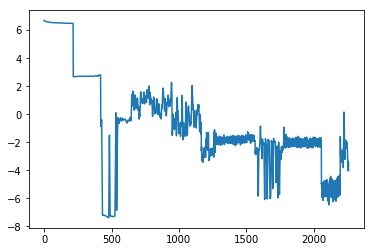

In [24]:
fig,ax=plt.subplots()
j=np.argwhere(np.array(feature_names)=='ankle_a16_y_mean')[0,0]
ax.plot(validdata2[:,j])

In [22]:
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus   #using pydotplus in windows10, python 3.6.X
dot_data = StringIO()

tree.export_graphviz(cls, out_file=dot_data, 
                         feature_names=feature_names,  
                         class_names=class_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("treeloso.pdf")

True

In [8]:
from sklearn.model_selection import train_test_split
X=datalabels[:,:98]
y=datalabels[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
cls=DecisionTreeClassifier()
cls.fit(X_train,y_train)
cls.score(X_test,y_test)

0.9901049475262369